

### Q-matrix design in Kalman filter

Q-matrix is the matrix that represents the white noise in the processing (predict) steps. The impact of Q:

- If Q is too small, the filter will be overconfident and will give less weight to the measurement.
- If Q is too large, the filter will more easily believe the noise from estimation.

In this design, a 3rd Newton kinematic model has Q in discretization:


$$
Q = \int_{0}^{dt} F(t)Q_cF^T(dt)dt
$$

$$
F = \begin{bmatrix} 1 & dt & \frac{dt^2}{2} \\ 0 & 1 & dt \\ 0 & 0 & 1 \end{bmatrix}
$$

The Q_c is the continuous white noise covariance matrix. The Q_c is a 3x3 matrix, and the diagonal elements are the variance of the white noise in the position, velocity, and acceleration. The off-diagonal elements are zero. The Q_c is a constant matrix.

$$
Q_c = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix} \sigma_{spectral}
$$

Solved we get:

$$
Q = \begin{bmatrix} \frac{dt^5}{20} & \frac{dt^4}{8} & \frac{dt^3}{6} \\ \frac{dt^4}{8} & \frac{dt^3}{3} & \frac{dt^2}{2} \\ \frac{dt^3}{6} & \frac{dt^2}{2} & dt \end{bmatrix} \sigma_{spectral}
$$


Please refer to the mentioned pages for more details.

Refer to "Kalman and Bayesian Filters in Python" page 246 and "Estimation with Applications to Tracking and Navigation" page 270.
$$
Refer to Kalman and Bayesian fliters in Python page 246 and Estimation with applicaitons to tracking and navigation page 272

### Replay Analysis

In [150]:
import requests
import pandas as pd
import json
import numpy as np

url = 'http://localhost:8000/replay/13/?start_date=2024-02-06%2010%3A00%3A00&end_date=2024-02-06%2010%3A20%3A00'  # Replace this with your actual endpoint URL
response = requests.get(url)

if response.status_code == 200:
    print("Request was successful.")
    data = response.json()  # Convert response to JSON format
    df = pd.read_json(data, orient='records')
else:
    print("Request failed. Status code:", response.status_code)
    
df['se'] = np.sqrt(df['cov_east'] + df['cov_east'])

Request was successful.


C:\Users\ZOZN109\AppData\Local\Temp\ipykernel_41148\530319350.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data, orient='records')


In [145]:
df[df['sensor_id'] == 8118]


,timestamp,sensor_type,sensor_id,dt,latitude,longitude,east,north,speed,heading,...,raw_north,raw_speed,raw_heading,cov_east,cov_north,cov_speed,cov_heading,raw_longitude,raw_latitude,se
255,2024-02-06 10:15:28+00:00,Beacon,8118,1.000,50.473916,2.977282,3.064099e+06,3.064099e+06,76.475653,19.989353,...,3.063600e+06,3.823147e+06,30.430334,1395.876592,194.352600,0.498993,3.725708,2.975561,50.469305,52.837044
256,2024-02-06 10:15:32+00:00,Beacon,8118,4.000,50.475977,2.978308,3.064321e+06,3.064321e+06,75.484859,22.924281,...,3.063600e+06,3.823147e+06,30.430334,4942.680076,1244.611579,1.572650,4.469831,2.975561,50.469305,99.425148
257,2024-02-06 10:15:32+00:00,Beacon,8118,0.001,50.475571,2.978159,3.064277e+06,3.064277e+06,74.974430,23.695017,...,3.063600e+06,3.823147e+06,30.430334,3204.638288,969.036538,1.568748,3.786103,2.975561,50.469305,80.057958


In [146]:
df[df['sensor_type'] == 'Beacon']

,timestamp,sensor_type,sensor_id,dt,latitude,longitude,east,north,speed,heading,...,raw_north,raw_speed,raw_heading,cov_east,cov_north,cov_speed,cov_heading,raw_longitude,raw_latitude,se
44,2024-02-06 10:02:43+00:00,Beacon,8068,1.000,50.011504,2.875840,3.013563e+06,3.013563e+06,82.180480,8.636403,...,3.013413e+06,3.811233e+06,199.765428,2484.287993,143.472399,0.512600,4.244481,2.876281,50.010176,70.488127
93,2024-02-06 10:05:51+00:00,Beacon,8116,9.000,50.146339,2.871786,3.028529e+06,3.028529e+06,82.202185,9.470548,...,3.028485e+06,3.812364e+06,134.025393,8738.431193,4241.285501,3.483814,6.150531,2.871829,50.145945,132.200085
98,2024-02-06 10:05:58+00:00,Beacon,8116,1.000,50.152127,2.871556,3.029172e+06,3.029172e+06,82.461947,3.912191,...,3.028485e+06,3.812364e+06,134.025393,2573.585965,124.110865,0.512258,4.237850,2.871829,50.145945,71.743794
99,2024-02-06 10:05:58+00:00,Beacon,8116,0.001,50.152052,2.871505,3.029164e+06,3.029164e+06,82.317183,3.791962,...,3.028485e+06,3.812364e+06,134.025393,2047.045764,121.911355,0.511949,3.957641,2.871829,50.145945,63.985088
116,2024-02-06 10:07:01+00:00,Beacon,2586,4.000,50.198083,2.868270,3.034286e+06,3.034286e+06,81.174736,0.456333,...,3.033341e+06,3.812695e+06,68.127354,5159.352493,696.195949,1.203193,4.485815,2.869923,50.189655,101.581027
177,2024-02-06 10:10:43+00:00,Beacon,2587,1.000,50.309680,2.891918,3.046486e+06,3.046486e+06,65.857200,22.203481,...,3.046123e+06,3.815394e+06,172.676053,999.982670,195.838696,0.498653,3.782738,2.890420,50.306304,44.720972
198,2024-02-06 10:12:01+00:00,Beacon,8117,4.000,50.345699,2.936821,3.050168e+06,3.050168e+06,63.985512,53.393892,...,3.050127e+06,3.819080e+06,297.195919,1892.559537,2523.514707,1.202169,4.933418,2.936593,50.345313,61.523321
255,2024-02-06 10:15:28+00:00,Beacon,8118,1.000,50.473916,2.977282,3.064099e+06,3.064099e+06,76.475653,19.989353,...,3.063600e+06,3.823147e+06,30.430334,1395.876592,194.352600,0.498993,3.725708,2.975561,50.469305,52.837044
256,2024-02-06 10:15:32+00:00,Beacon,8118,4.000,50.475977,2.978308,3.064321e+06,3.064321e+06,75.484859,22.924281,...,3.063600e+06,3.823147e+06,30.430334,4942.680076,1244.611579,1.572650,4.469831,2.975561,50.469305,99.425148
257,2024-02-06 10:15:32+00:00,Beacon,8118,0.001,50.475571,2.978159,3.064277e+06,3.064277e+06,74.974430,23.695017,...,3.063600e+06,3.823147e+06,30.430334,3204.638288,969.036538,1.568748,3.786103,2.975561,50.469305,80.057958


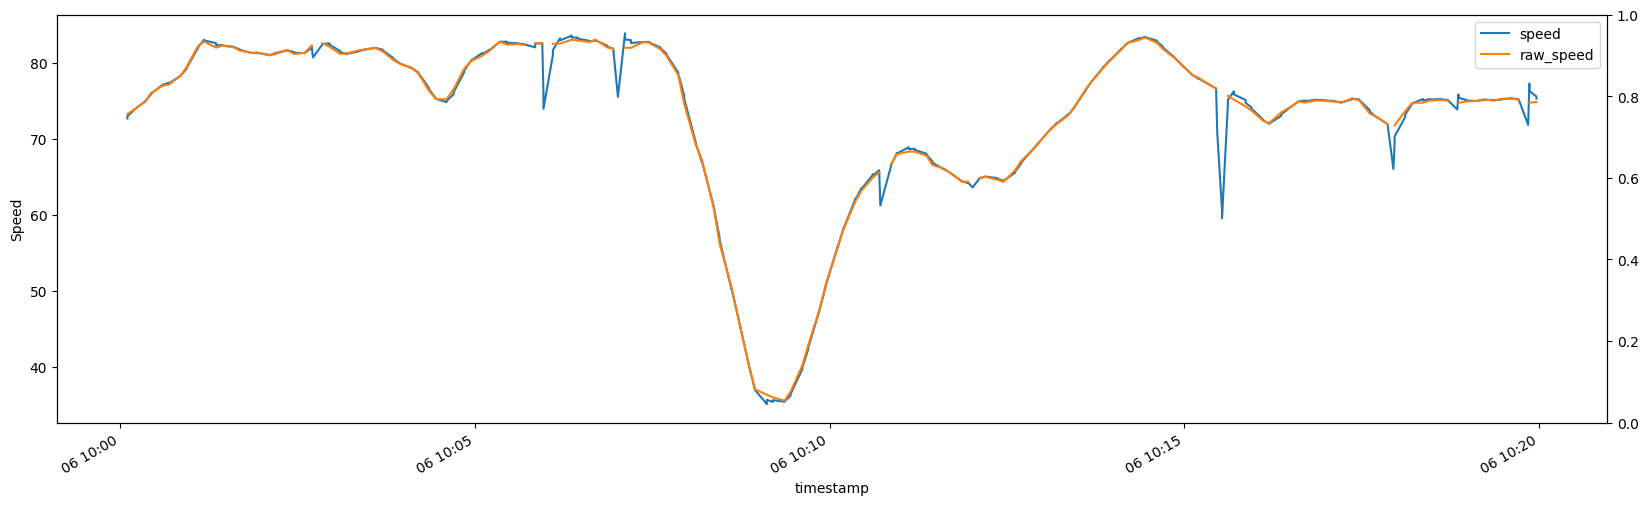

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(20, 6))  # Create a figure and axes for the primary plot
ax2 = ax1.twinx()  # Create a secondary y-axis

df.plot(x='timestamp', y=['speed', 'raw_speed'], kind='line', ax=ax1)  # Plot speed and raw_speed on the primary y-axis
#df.plot(x='timestamp', y=['heading', 'raw_heading'], kind='line', ax=ax2)  # Plot heading and raw_heading on the secondary y-axis

ax1.set_ylabel('Speed')  # Set label for the primary y-axis
#ax2.set_ylabel('Heading')  # Set label for the secondary y-axis

plt.show()  # Display the plot


In [149]:
import folium
import numpy as np
import utm
import math
import branca

# Create a map centered at the mean latitude and longitude values
m = folium.Map(location=[df['latitude'].iloc[-1], df['longitude'].iloc[-1]], zoom_start=13)

# Define a color mapping function or dictionary
color_mapping = {
    45332: 'red',
    45337: 'blue',
    # Add more sensor_id-color mappings as needed
}

# Iterate over the dataframe rows and add markers and circles to the map
for i in range(len(df)):
    sensor_id = df['sensor_id'].iloc[i]
    color = color_mapping.get(sensor_id, 'gray')  # Default to gray if sensor_id is not found in the mapping
    folium.Marker([df['raw_latitude'].iloc[i], df['raw_longitude'].iloc[i]], popup=sensor_id).add_to(m)
    folium.Circle([df['latitude'].iloc[i], df['longitude'].iloc[i]], radius=df['se'].iloc[i], color=color, popup=sensor_id, fill=True, fill_color=color).add_to(m)

m